In [1]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [4]:
import fitness_mcmc
import fitness_mcmc.data_io as io 
import fitness_mcmc.fitness_mcmc as m

In [6]:
"""
Loading data and looking at the first 40 ordered genotypes. 
"""
data, time, ordered_frequencies  = io.load_data('filtered_counts_ypd_temp_30.txt')
fitness_model = m.Fitness_Model(ordered_frequencies[0:40],time)
fitness_model.find_MAP()

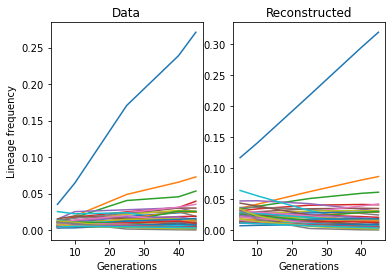

In [7]:
fitness_model.plot_MAP_estimate(type = "lin")

prior: $$s \sim \text{flat}('fitnesses') $$
likelihood: $$f \sim \text{poisson}(\lambda)$$
where $$\lambda_i \sim \frac {f0_i * exp(s_i * t)} {\sum_{i} f0_i * exp(s_i * t)}$$
posterior: $$p(s \mid D,M,I) \propto p(s \mid M,I)p(D\mid M,I,s)$$

In [ ]:
#simulated data 
N = 10
num_gens = 49
f0_vals = np.random.random(N)
s_vals = np.random.random(N) / 10

times = np.array([5, 10, 25, 40, 45])

traj = create_trajectories(f0_vals, s_vals, times)
# The reference trajectory should be the one we know most about (have the most counts for)
# The reference trajectory should be indexed first in the data array
idx = np.flipud(np.argsort(np.sum(traj, axis = 1)))
traj = traj[idx, :]

In [ ]:
fitness_model.mcmc_sample()

In [ ]:
fitness_model.plot_mcmc_posterior()